### 本次作業將先訓練判斷 Fashion MNIST 資料集之模型，再將該模型部分神經網路拿來訓練 CIFAR-10 資料集

## 1. 匯入所需套件

In [1]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

## 2. 讀入並整理 Fashion MNSIT 資料集
* Fashion MNSIT 是包含 10 種類的灰階小圖資料集，每張圖的尺寸為  28×28 


In [2]:
name_list = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [3]:
# Load fashion_mnist
from tensorflow.keras.datasets import fashion_mnist
(x_train0, y_train0), (x_test0, y_test0) = fashion_mnist.load_data()

# 1 stands for one channel(greyscale)
# Normalize the range of features
x_train = x_train0.reshape(60000, 28, 28, 1) / x_train0.max()
x_test = x_test0.reshape(10000, 28, 28, 1) / x_test0.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

### 檢視測試資料

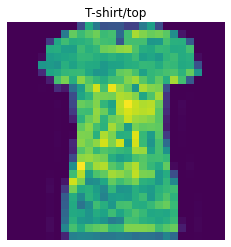

In [4]:
idx = np.random.randint(x_train0.shape[0])
x_sample = x_train0[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(x_sample)
plt.title(name_list[y_sample])
plt.axis('off');

In [5]:
print(x_train.shape, x_test.shape, sep="\n") # 查看數據型態

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## 3. 建立用於分類 Fashion MNSIT 的卷積神經網路

In [6]:
CNN_layers = [Conv2D(24, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu', name='Conv_1'),
              MaxPooling2D(pool_size = (2,2)),
              Conv2D(96, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPooling2D(pool_size = (2,2)),
              Conv2D(384, (3, 3), padding='same', activation='relu', name='Conv_3'),
              MaxPooling2D(pool_size = (2,2))]

FC_layers = [Dropout(0.25),
             Flatten(),
             Dense(units=128, activation='relu'),
             Dense(units=10, activation='softmax')]

In [7]:
model = Sequential(CNN_layers + FC_layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 24)        240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 24)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 96)        20832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 96)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 384)         332160    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 384)         0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 384)         0

In [8]:
#組裝神經網路
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(),
              metrics=['categorical_accuracy'])

## 4. 訓練模型

In [9]:
model.fit(x_train, y_train, 
          batch_size=100, 
          epochs=5,
          validation_data=(x_test, y_test))

Epoch 1/5
600/600 [==============================] - 167s 278ms/step - loss: 0.4839 - categorical_accuracy: 0.8229 - val_loss: 0.3264 - val_categorical_accuracy: 0.8842
Epoch 2/5
600/600 [==============================] - 170s 283ms/step - loss: 0.2940 - categorical_accuracy: 0.8921 - val_loss: 0.2741 - val_categorical_accuracy: 0.8992
Epoch 3/5
600/600 [==============================] - 171s 284ms/step - loss: 0.2507 - categorical_accuracy: 0.9084 - val_loss: 0.2476 - val_categorical_accuracy: 0.9092
Epoch 4/5
600/600 [==============================] - 170s 284ms/step - loss: 0.2187 - categorical_accuracy: 0.9203 - val_loss: 0.2562 - val_categorical_accuracy: 0.9057
Epoch 5/5
600/600 [==============================] - 175s 292ms/step - loss: 0.1981 - categorical_accuracy: 0.9269 - val_loss: 0.2328 - val_categorical_accuracy: 0.9146


## 5. 模型預測: 預測資料集的準確率

In [10]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 6s 20ms/step - loss: 0.2328 - categorical_accuracy: 0.9146
Train Accuracy: 94.01666522026062
Test Accuracy: 91.46000146865845


# 遷移學習(Transfer Learning)

## 1. 讀入整理 CIFAR 10 資料集
* CIFAR 10 是包含 10 種類的彩色小圖資料集，每張圖的尺寸為  32×32

In [28]:
# Load CIFAR 10
(u_train, v_train0), (u_test, v_test0) = datasets.cifar10.load_data()

# Normalize the range of features
u_train = u_train / u_train.max()
u_test = u_test / u_test.max()

# One-hot encoding
v_train = to_categorical(v_train0, 10)
v_test = to_categorical(v_test0, 10)

### 檢視測試資料

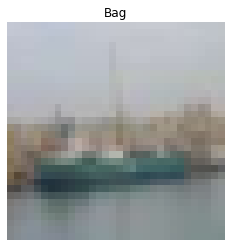

In [29]:
idx = np.random.randint(u_train.shape[0])
u_sample = u_train[idx]
v_sample = v_train0[idx].squeeze()

plt.imshow(u_sample)
plt.title(name_list[v_sample])
plt.axis('off');

## 2. Layer transfer

In [30]:
# New CNN layers for CIFAR-10
CNN_layers_CF10 = [Conv2D(24, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu', name='Conv_1'),
                   MaxPooling2D(pool_size = (2,2)),
                   Conv2D(96, (3, 3), padding='same', activation='relu', name='Conv_2'),
                   MaxPooling2D(pool_size = (2,2)),
                   Conv2D(384, (3, 3), padding='same', activation='relu', name='Conv_3'),
                   MaxPooling2D(pool_size = (2,2))]

In [31]:
model_CF10 = Sequential(CNN_layers_CF10 + FC_layers)
model_CF10.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 24)        672       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 24)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 96)        20832     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 96)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 384)         332160    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 384)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 384)        

## 3. 採Frozen的訓練方式

In [32]:
for layer in FC_layers:
    layer.trainable = False

In [33]:
model_CF10.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 24)        672       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 24)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 96)        20832     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 96)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 384)         332160    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 384)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 384)        

## 4. 訓練模型

In [34]:
model_CF10.compile(loss='categorical_crossentropy', 
                    optimizer=Adam(),
                    metrics=['categorical_accuracy'])

model_CF10.fit(u_train, v_train,
                batch_size=100, 
                epochs=5,
                validation_data=(u_test, v_test))

Epoch 1/5
500/500 [==============================] - 174s 349ms/step - loss: 1.6863 - categorical_accuracy: 0.3899 - val_loss: 1.3447 - val_categorical_accuracy: 0.5241
Epoch 2/5
500/500 [==============================] - 197s 393ms/step - loss: 1.3436 - categorical_accuracy: 0.5233 - val_loss: 1.1960 - val_categorical_accuracy: 0.5870
Epoch 3/5
500/500 [==============================] - 201s 403ms/step - loss: 1.1874 - categorical_accuracy: 0.5829 - val_loss: 1.0741 - val_categorical_accuracy: 0.6241
Epoch 4/5
500/500 [==============================] - 202s 405ms/step - loss: 1.0820 - categorical_accuracy: 0.6223 - val_loss: 0.9886 - val_categorical_accuracy: 0.6574
Epoch 5/5
500/500 [==============================] - 182s 364ms/step - loss: 1.0116 - categorical_accuracy: 0.6483 - val_loss: 0.9691 - val_categorical_accuracy: 0.6669


## 5. 模型預測: 預測資料集的準確率

In [35]:
score_train = model_CF10.evaluate(u_train, v_train)
score_test = model_CF10.evaluate(u_test, v_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 10s 32ms/step - loss: 0.9691 - categorical_accuracy: 0.6669
Train Accuracy: 70.08799910545349
Test Accuracy: 66.68999791145325


## 6. 查看舊模型的預測表現是否受到影響

In [36]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 6s 20ms/step - loss: 0.2328 - categorical_accuracy: 0.9146
Train Accuracy: 94.01666522026062
Test Accuracy: 91.46000146865845


* 可見舊模型之預測表現不受遷移學習後影響，原因是我們採用了Frozen而非Fine-tune之訓練方式，在訓練新模型中並沒有將借來的神經網路重新訓練